# Sympy

SymPy is a Python library made for symbolic mathematics. It allows us to make exact (not approximate) symbolic calculations for mathematical objects such as:

- Algebraic expressions and solutions
- Limits, derivatives and integrals
- Partial differential equations
- Matrices
- Taylor and Fourier series

A tipical SymPy block of code starts like this:

In [ ]:
import sympy as sp

# If we don't use this, the code will render in pure ASCII characters without natural display
sp.init_printing(use_unicode = True)

After that, we can start using it in contexts like:

## 1. Polynomials

In [11]:
x, y = sp.symbols("x y") # This variables will be SymPy symbolic objects instead of numbers
z = (x + y)**2 # We can define algebraic expressions using symbols
z

We can expand this expressions like this, that is, performing distribution, power rules and other properties to obtain a result as a sum of monomials. If the expression is already expanded, it will remain as it is.

In [5]:
sp.expand(z)

This process can even do other kinds of functions if we use the right flags:

In [8]:
from sympy import sin # This sin is not the same as math's or NumPy's

z = sin(x + x)
sp.expand(z, trig = True)

We can do the opposite process to obtain factored expressions:

In [12]:
w = x**3 - 3*x**2 * y-3 *x* y**2 - y**3 + 6*x * y**2
sp.factor(w)

`collect` is useful when one wants to find the coefficients of a polynomial.

In [8]:
a, b, c = sp.symbols("a b c")
sp.collect(a*x**2 + b*x**2 + a*x - b*x + c, x)

### Polynomial roots
Finding roots of polynomials is easy for polynomials of degree 1 and 2. For 3rd and 4th grade the formulas are really cumbersome, and for degree higher than 5 it is impossible to find a general formula. `sympy` can find roots for polynomials of degree 4 or lower.

In [9]:
sp.solve(x**2 - 2*x + 1, x)

In [10]:
sp.solve(x**2 + 1, x)

In [11]:
sp.solve(3*x**3 + 2*x + 5, x)

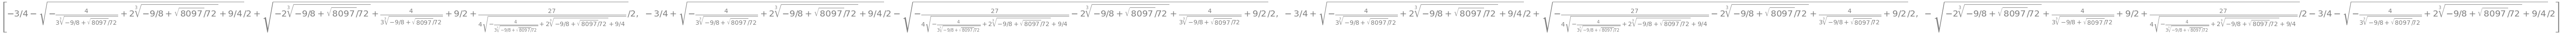

In [12]:
sp.solve(x**4 + 3*x**3 - 2, x)

Check what happens for polynomials with degree greater than 5:

In [13]:
sp.solve(x**6 - x**4 + 3*x**3 - 2, x)

To find numerical roots, we can use `numpy` (or `scipy`)

In [14]:
import numpy.polynomial.polynomial as poly

In [15]:
poly.polyroots([1, 0, -1, 3, 0, 0, -2])

array([-0.68213911-1.05600261j, -0.68213911+1.05600261j,
       -0.58042709+0.j        ,  0.41182793-0.5626706j ,
        0.41182793+0.5626706j ,  1.12104943+0.j        ])

`solve` can face other kinds of equations.

In [16]:
sp.solve(sp.sin(x), x)

In [17]:
sp.solve(1 / (1*x**2) - 5, x)

### Fractions

In [19]:
a, b = sp.symbols("\\Sigma \\Omega") #LaTeX friendly
z = x / y + a / b
z

In [20]:
sp.latex(z)

'\\frac{x}{y} + \\frac{\\Sigma}{\\Omega}'

In [21]:
sp.fraction(sp.together(z))

### Limits

In [22]:
x = sp.symbols("x")

In [23]:
sp.limit(sp.exp(x) / x, x, sp.oo)

In [24]:
sp.limit(sp.sin(x) / x, x, 0)

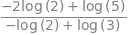

In [25]:
#Ref: https://math.stackexchange.com/questions/347078/weird-calculus-limit
sp.limit((5**x - 4**x) / (3**x - 2**x), x, 0)

In [26]:
sp.limit((1 + 1/x)**x, x, sp.oo)

### Derivatives

In [27]:
sp.diff(sp.sin(x)**2 * sp.exp(x), x)

In [28]:
a = sp.diff(sp.sin(x)**2 * sp.exp(x), x)
a.replace(x, sp.pi/2.)

### Integrals

In [29]:
sp.integrate(x**5, x)

In [31]:
sp.integrate(sp.sqrt(sp.tan(x)), x)

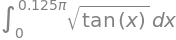

In [34]:
sp.integrate(sp.sqrt(sp.tan(x)), (x, 0, sp.pi/8.))

In [32]:
sp.integrate(sp.exp(-x**2), (x,-sp.oo, sp.oo))

### Ordinary Differential Equations

In [35]:
f = sp.Function("f")

Let us solve $$f''(x)+f(x)=0$$

In [36]:
sp.dsolve(f(x).diff(x,x) + f(x), f(x))

Now let us solve $$f''(x)-f(x)=e^x$$

In [37]:
sp.dsolve(f(x).diff(x,x) - f(x) - sp.exp(x), f(x))

### Partial Differential Equations

In [38]:
f = sp.Function('f')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
equation = ux + uy
equation

In [39]:
m = sp.pdsolve(equation)
m

### Matrices

In [40]:
a, b, c, d = sp.symbols("a b c d")
m = sp.Matrix([[a,b], [c,d]])
m.eigenvals()

### Series
#### Taylor Series

In [41]:
f = sp.sin(x)

# Compute the Taylor series expansion around x = 0 (Maclaurin series)
taylor_series = f.series(x, 0, 10)  # Taylor expansion up to the 9th degree
taylor_series

In [42]:
taylor_series.simplify()

In [43]:
# Convert the symbolic series expression to a numerical function
taylor_series_function = sp.lambdify(x, taylor_series.removeO())  # Removing the order term O(x^n)
sin_function = sp.lambdify(x, f)

In [44]:
sin_function(3.1592)

#### Fourier Series

In [46]:
# Define the function f(x) = x in the range (-π, π)
f = x

# Compute the Fourier series up to the 6th term
fourier_series = sp.fourier_series(f, (x, -sp.pi, sp.pi))
fourier_series.truncate(6)

- Plot this fourier series against the original function.

### Geometry

In [47]:
# Define the equation of the circle: x^2 + y^2 = 1
circle_eq = sp.Eq(x**2 + y**2, 1)

# Define the equation of a line: y = x + 1/2
line_eq = sp.Eq(y, x + sp.Rational(1, 2))

# Solve the system of equations (circle and line)
intersection_points = sp.solve([circle_eq, line_eq], (x, y))
intersection_points

### Command Line Interface
If you use
```python
from sympy import init_printing
from sympy import init_session
init_session(quiet = True) 
```
You can print math equations in ascii as console output.